<a href="https://colab.research.google.com/github/Sedighe-Raeisi/NLP_with_Dijikala_dataset/blob/main/NLP_with_Dijikala_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing needed packages

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

#Installing the Hazm

In [ ]:
!pip install hazm

     |████████████████████████████████| 317kB 7.7MB/s 
     |████████████████████████████████| 235kB 17.2MB/s 
     |████████████████████████████████| 1.4MB 17.7MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=153436 sha256=cdeb82bd77eddebf7e757f40b510fd367ef23ca3c10804492105b32611f72c80
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394468 sha256=38cab470a557a6bf341c96900d0b2c46ed6777c2fb410f7e798a095cd8faa682
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


#Loading google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the dataset from kaggle to my drive

In [ ]:
# we downloaded the data from the adress: 'https://www.kaggle.com/soheiltehranipour/digikala-comments-persian-sentiment-analysis'

In [ ]:
! pip install -q kaggle

In [ ]:
# from google.colab import files

In [ ]:
!cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/

In [ ]:
!kaggle datasets download -d soheiltehranipour/digikala-comments-persian-sentiment-analysis

  0% 0.00/409k [00:00<?, ?B/s]
100% 409k/409k [00:00<00:00, 60.3MB/s]


In [ ]:
!unzip digikala-comments-persian-sentiment-analysis

Archive:  digikala-comments-persian-sentiment-analysis.zip
  inflating: data.csv                


In [ ]:
!cp '/content/data.csv' -r '/content/drive/My Drive/MachineLearing/dijikala'

#reading the datasets

In [ ]:
path='/content/drive/My Drive/MachineLearing/dijikala/data.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1


#Prepairing the dataframe

In [ ]:
del(df['Score'])

In [ ]:
df.head()

,Text,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,1
1,خرید این محصول رو توصیه میکنم,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,1


In [ ]:
set(df['Suggestion'])

{1, 2, 3}

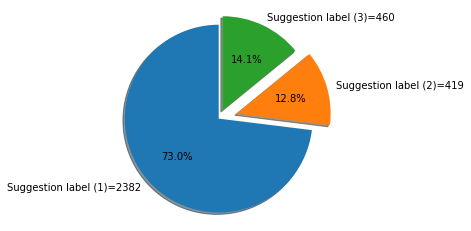

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
d1=len(df['Suggestion'][df['Suggestion']==1])
d2=len(df['Suggestion'][df['Suggestion']==2])
d3=len(df['Suggestion'][df['Suggestion']==3])
labels = f"Suggestion label (1)={d1}",f"Suggestion label (2)={d2}",f"Suggestion label (3)={d3}"
sizes = [len(df['Suggestion'][df['Suggestion']==1]),len(df['Suggestion'][df['Suggestion']==2]), len(df['Suggestion'][df['Suggestion']==3])]
explode = (0,.2,0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#Preprocessing: Stemming, Tokenizing,Normalizing,...



In [ ]:
from hazm import *

In [ ]:
normalizer=Normalizer()

In [ ]:
stemmer = Stemmer()

In [ ]:
tokenizer = WordTokenizer()

In [ ]:
pers_dig= ['۰', '۱', '۲', '۳', '٦', '٥', '٤','۴', '۵', '۶', '۷', '۸', '۹']
stop_words = ['!', '%','،،','.',',','(',')','/','|','"','،',
              '«','»',':','و','در','این','آن','از','را','تا','با','رو','ب',
              'برای','به','که','ها','هر','❇️','✅',
              'است','داشته', 'میلیارد','هزار', 'میلیارد', 'تومان', 'ریال', 
              'اقدام', 'نماید', 'هست','0-9']+pers_dig+[0-9]

In [ ]:
def stp_remove(doc):
  rw=[]
  for w in tokenizer.tokenize(doc):
    if w not in stop_words:
      rw.append(w)
  return ' '.join(rw)

In [ ]:
df['cleaned']=df['Text'].apply(lambda x: stp_remove((normalizer.character_refinement(normalizer.affix_spacing(normalizer.affix_spacing(x))))))

In [ ]:
df.head()

,Text,Suggestion,cleaned
0,این اولین تجربه من برای خرید ایفون هست امروز...,1,اولین تجربه من خرید ایفون امروز دستم رسیده اسم...
1,خرید این محصول رو توصیه میکنم,1,خرید محصول توصیه میکنم
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,1,ساله گوشی دارم هیچ نقطه ضعفی ازش ندیدم
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,1,سلام خدمت دوستان گوشی همه نظر عالی کیفیت ساخت ...
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,1,سلام دوستانی نگران شکستن صفحه نمایش هستند بدون...


#Using Tfidf for Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(df['cleaned'])

In [ ]:
X = X.todense()
print(X.shape)

(3261, 11994)


#Prepairing Test and Train split

In [ ]:
Y=df['Suggestion'].values.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,Y[:],shuffle=True, random_state=0)

#Using a classifier 

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix



##Random Forest ckassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.fit(x_train, y_train).predict(x_test)

Getting the score

In [ ]:
clf.score(x_test,y_test)

0.7965686274509803

In [ ]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)
clf_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.79      1.00      0.88       615
           2       0.90      0.20      0.33        94
           3       0.86      0.18      0.29       107

    accuracy                           0.80       816
   macro avg       0.85      0.46      0.50       816
weighted avg       0.81      0.80      0.74       816



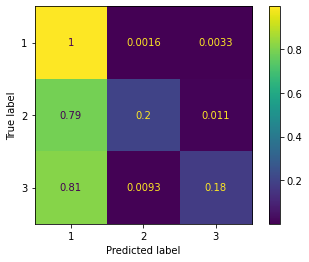

In [ ]:
plot_confusion_matrix(clf, x_test, y_test, normalize='true')


##SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

              precision    recall  f1-score   support

           1       0.85      0.92      0.88       615
           2       0.41      0.28      0.33        94
           3       0.62      0.48      0.54       107

    accuracy                           0.79       816
   macro avg       0.63      0.56      0.58       816
weighted avg       0.77      0.79      0.77       816



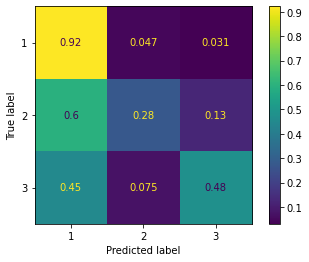

In [ ]:
clf = SGDClassifier()
y_pred = clf.fit(x_train, y_train).predict(x_test)
clf_report = classification_report(y_test, y_pred)
print(clf_report)

plot_confusion_matrix(clf, x_test, y_test, normalize='true')

In [ ]:
clf.score(x_test,y_test)

0.7892156862745098